<a href="https://colab.research.google.com/github/Criths1612/Proyecto1---Data-Analitycs/blob/main/Proyecto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

“PROGRAMA ESPECIALIZADO CIENCIA DE DATOS CON

PYTHON”
PROYECTO No 01



In [ ]:
#Importamos las librerias
import pandas as pd
import numpy as np
import random

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para facilitar con la ejecución del proyecto he descargado un csv con datos de ventas.

In [ ]:
#se crea el data frame
df_ventas = pd.read_csv("/content/drive/MyDrive/Programa de ciencia de datos con python/Proyecto1/Ventas tienda por departamento.csv", delimiter = ";")
df_ventas

,Tienda,Marca,Tipo,Género,Talla,Color,Categoria,precio de venta S/,Fecha,Hora
0,Lima,Asics,WB1820,Femenino,42,Azul,Pantalon,89.00,15/07/2015,07:32:00
1,Lima,Asics,Kayano Single Tab,Usinex,42-44,Azul,Ropa interior,24.99,15/07/2015,07:33:00
2,Lima,Asics,WB1820,Femenino,37,Rosado,Pantalon,89.00,15/07/2015,07:52:00
3,Lima,Asics,WB2585,Femenino,39,Negro,Pantalon,99.00,15/07/2015,07:58:00
4,Lima,Asics,WB1820,Femenino,46,Multicolor,Pantalon,89.00,15/07/2015,08:19:00
...,...,...,...,...,...,...,...,...,...,...
795,Provincias,Asics,WB1820,Femenino,36,Negro,Pantalon,89.00,22/07/2015,12:37:00
796,Provincias,Asics,Quick Light Cushion,Usinex,36-38,Verde,Ropa interior,19.00,22/07/2015,12:49:00
797,Provincias,Asics,MB1878,Masculino,46,Negro,Pantalon,99.00,22/07/2015,13:00:00
798,Provincias,Asics,MB1878,Masculino,40,Negro,Pantalon,99.00,22/07/2015,13:03:00


#Ejercicio N°1:
Escribir un programa que pregunte al usuario o genere las ventas
de los últimos 5 días, y muestre por pantalla una serie (Dataframe)
con los datos de las ventas por producto (opcional): Nro de
unidades y precio unitario, indexada por los días, antes y después
de aplicarles un descuento del 5%.


Antes de resolver el primer ejercicio debemos agregar algunas columnas (Descuento, cantidad, fecha, y el total)
Para ello nos apoyamos con algunas funciones para generas datos en las nuevas columnas.

In [ ]:
num_filas = df_ventas.shape[0]  #hallamos el numero de filas para saber cuántos días se agregará a la columna fechas.
np.random.seed(1234567890)      # agregamos la semilla para que los datos aleatorios se mantengan constante.

fechas_aleatorias = pd.date_range(start=pd.Timestamp.today().date()-pd.DateOffset(days=num_filas-1), periods=num_filas, freq='D') #generamos fechas con la funcion
#data_range. Para que el último día de la columna sea la fecha actual
df_ventas['Fecha'] = fechas_aleatorias

descuento = np.random.randint(0,11, size=num_filas)
df_ventas['Descuento%'] = descuento                 #generamos una columna "descuento" con datos aletorios entre 0 y 10

cantidad = np.random.randint(0,21, size=num_filas)
df_ventas['Cantidad'] = cantidad                    #generamos la columna "cantidad" con datos aleatorios entre 0 y 20





df_ventas['Total sin descuento'] = df_ventas['Cantidad']*df_ventas['precio de venta S/'] #generamos la columna "total sin descuento" multiplicando las columnas "precio" y "cantidad"
df_ventas['Total con descuento'] = df_ventas['Total sin descuento']*(1-df_ventas['Descuento%']/100) #generamos la columna "total con descuento"

In [ ]:
df_ventas

,Tienda,Marca,Tipo,Género,Talla,Color,Categoria,precio de venta S/,Fecha,Hora,Descuento%,Cantidad,Total sin descuento,Total con descuento
0,Lima,Asics,WB1820,Femenino,42,Azul,Pantalon,89.00,2021-09-04,07:32:00,2,7,623.00,610.5400
1,Lima,Asics,Kayano Single Tab,Usinex,42-44,Azul,Ropa interior,24.99,2021-09-05,07:33:00,6,17,424.83,399.3402
2,Lima,Asics,WB1820,Femenino,37,Rosado,Pantalon,89.00,2021-09-06,07:52:00,3,11,979.00,949.6300
3,Lima,Asics,WB2585,Femenino,39,Negro,Pantalon,99.00,2021-09-07,07:58:00,1,12,1188.00,1176.1200
4,Lima,Asics,WB1820,Femenino,46,Multicolor,Pantalon,89.00,2021-09-08,08:19:00,9,10,890.00,809.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Provincias,Asics,WB1820,Femenino,36,Negro,Pantalon,89.00,2023-11-08,12:37:00,0,8,712.00,712.0000
796,Provincias,Asics,Quick Light Cushion,Usinex,36-38,Verde,Ropa interior,19.00,2023-11-09,12:49:00,10,9,171.00,153.9000
797,Provincias,Asics,MB1878,Masculino,46,Negro,Pantalon,99.00,2023-11-10,13:00:00,7,1,99.00,92.0700
798,Provincias,Asics,MB1878,Masculino,40,Negro,Pantalon,99.00,2023-11-11,13:03:00,0,8,792.00,792.0000


Procedemos a resolver el primer ejercicio

In [ ]:
fecha_hoy1 = df_ventas.loc[799,"Fecha"] #definimos como "fecha_hoy" el último dia de la columna "fecha"
fecha_hoy1

Timestamp('2023-11-12 00:00:00')

In [ ]:
#creamos la función "ultimas_ventas" en el que recibe el parametro n que son los últimos días que se quiere mostrar

def ultimas_ventas():
  n = int(input('Ingrese los n últimos días: '))  #el input debe ser un número entero
  fecha_hoy = df_ventas.iloc[-1,df_ventas.columns.get_loc("Fecha")] #definimos como "fecha_hoy" el último dia de la columna "fecha"
  fecha_inicio = fecha_hoy - pd.DateOffset(days=n)  #fecha_inicio es la diferencia entre la fecha actual y los n días inputados
  df_ven_ult5dias= df_ventas[df_ventas['Fecha']>=fecha_inicio][['Fecha', 'Tipo', 'Cantidad','precio de venta S/','Descuento%','Total sin descuento','Total con descuento']]
  #creamos el dataframe respectivo
  return df_ven_ult5dias.set_index('Fecha')

In [ ]:
ultimas_ventas ()

Ingrese los n últimos días: 6


,Tipo,Cantidad,precio de venta S/,Descuento%,Total sin descuento,Total con descuento
Fecha,,,,,,
2023-11-06,WB1820,4,89.0,8,356.0,327.52
2023-11-07,MB1878,11,99.0,9,1089.0,990.99
2023-11-08,WB1820,8,89.0,0,712.0,712.00
2023-11-09,Quick Light Cushion,9,19.0,10,171.0,153.90
2023-11-10,MB1878,1,99.0,7,99.0,92.07
2023-11-11,MB1878,8,99.0,0,792.0,792.00
2023-11-12,WB1820,2,89.0,0,178.0,178.00


#Ejercicio No 2
Escribir un programa que reciba un diccionario con los ingresos
mensuales de los clientes de una empresa, y devuelva una serie
con el ingreso mínimo, máximo y media.
El resultado final debe ser una serie con los estadísticos.

In [ ]:
ingreso_mensual= {}                                       #definimos el diccionario
for n in range(1, 101):                                   #n será el número de clientes desde 1 hasta 100
  ingreso = np.random.randint(1000, 5000)                 #definimos el ingreso como datos aleatorios entre 1000 y 5000
  ingreso_mensual[f'Cliente{n}'] = [ingreso]              #al diccionario "ingreso_mensual" se le agrega los nombres de los clientes
                                                          #con su respectivo ingreso. para ello nos ayudamos del f-string para que nos
                                                          #los valores de n lo tome como una variable
  df_ingreso_mensual = pd.DataFrame(ingreso_mensual).T    #creamos el dataframe con la transpuesta de "ingreso_mensual"
  df_ingreso_mensual.columns = ['Ingreso mensual']        #cambiamos el nombre de la columna a 'Ingreso mensual
df_ingreso_mensual.describe().loc[['min','max','mean']]   #con ayuda de la función describe() hallamos el minimo, maximo, y la media de los salarios.




,Ingreso mensual
min,1031.00
max,4962.00
mean,3005.76


#Ejercicio No 3
Escribir programa que genere y muestre por pantalla un DataFrame
con los datos de la siguiente tabla:

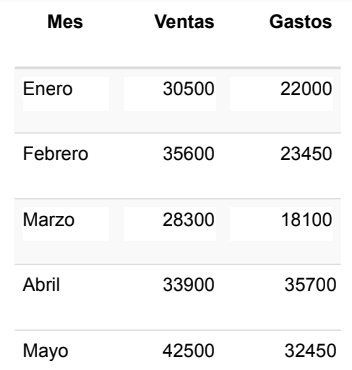

A continuación, generar nuevas columna:
1. Columna 1 = Gasto/Ventas*100.
2. Columna 2 = Si Ventas>= 30000, imprimir “Meta Superada”,
caso contrario imprimir “Meta no Superada”.
3. Columna 3 = Si Gasto>Ventas, calcular el sobre gasto.
4. Obtener el total de las ventas de los últimos 3 meses
5. Obtener el total de gastos de febrero a abril

In [ ]:
ventas = {'Mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo'],                  #cargamos los datos de la tabla en el diccionario "ventas"
          'Ventas': [30500, 35600, 28300, 33900, 42500],
          'Gastos':[22000, 23450, 18100, 35700, 32450]}
df_ventas2 = pd.DataFrame(ventas)                                                 #generamos el dataframe
df_ventas2['Columna1'] = df_ventas2['Gastos']/df_ventas2['Ventas']*100             #generamos la columna1 = gastos/ventas*100
df_ventas2['Columna2'] = np.where(df_ventas2['Ventas']>= 30000, 'Meta Superada', 'Meta no superada')  #para generar la columna2 nos valemos de la
                                                                                                      #función condicional np.where
df_ventas2['Columna3'] = np.where(df_ventas2['Gastos']>df_ventas2['Ventas'], df_ventas2['Gastos']-df_ventas2['Ventas'], 'No hubo sobregasto')
#para la columna3 tmb usamos e la función np.where


#con esto tenemos resuelto los incisos 1, 2 y 3 del ejercicio 3


In [ ]:
df_ventas2

,Mes,Ventas,Gastos,Columna1,Columna2,Columna3
0,Enero,30500,22000,72.131148,Meta Superada,No hubo sobregasto
1,Febrero,35600,23450,65.870787,Meta Superada,No hubo sobregasto
2,Marzo,28300,18100,63.957597,Meta no superada,No hubo sobregasto
3,Abril,33900,35700,105.309735,Meta Superada,1800
4,Mayo,42500,32450,76.352941,Meta Superada,No hubo sobregasto


In [ ]:
print('La venta total de los últimos 3 meses es:')
df_ventas2.iloc[-3:, 1].sum()                       #para el inciso 4 usamos la función sum() de las 3 ultimas filas de la columna ventas

La venta total de los últimos 3 meses es:


104700

In [ ]:
print('El total de gastos desde febrero hasta abril es:')
df_ventas2.iloc[1:4, 2].sum()                       #para el inciso 5 usamos la función sum() desde el index 1 hasta el 3 que corresponden
                                                    #a los meses que estan entre enero y mayo, de la columna gastos

El total de gastos desde febrero hasta abril es:


77250

#Ejercicio No 4
Con el siguiente fichero datos_seguros.csv contiene información
de riesgo de clientes de un banco. Escribir un programa con los
siguientes requisitos:
1. Generar un DataFrame con los datos del fichero.
2. Mostrar por pantalla las dimensiones del DataFrame, el
número de datos que contiene, los nombres de sus columnas
y filas, los tipos de datos de las columnas, mostrar las 10
primeras filas y las 10 últimas filas, verificar si tiene datos
perdidos/nulos.
3. Extraer las 1000 primeras filas y almacenarlas en un
contenedor.

In [ ]:
df_seguros = pd.read_csv("/content/drive/MyDrive/Programa de ciencia de datos con python/Proyecto1/datos_seguros.csv", delimiter=";")
df_seguros    #generamos el dataframe y mostramos en pantalla

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
0,201506,0,3.0,0.0,2300.0,0.000000,0.0,0.0,15.00,18.644444,52.80,NaN,M,58,LIMA,0.000000,0.000000
1,201506,0,2.0,3215.0,3500.0,0.918571,0.0,0.0,548.98,2632.020000,5709.24,NaN,M,69,JUNIN,0.816134,0.930867
2,201506,0,1.0,3169.0,5000.0,0.633800,0.0,0.0,0.00,4999.000000,4999.00,0.0,M,16,CALLAO,1.000000,1.000000
3,201506,1,1.0,6495.0,8450.0,0.768639,2.0,505.0,2137.94,4900.191666,11206.80,NaN,F,62,LIMA,0.413831,0.505504
4,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,12.37,12.370000,12.37,NaN,F,5,AREQUIPA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45793,201505,0,2.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,F,4,LIMA,0.000000,0.000000
45794,201505,0,NaN,NaN,NaN,NaN,2.0,6189.0,1314.10,1314.100000,1314.10,NaN,F,76,LA LIBERTAD,0.000000,0.000000
45795,201506,0,NaN,NaN,NaN,NaN,1.0,138.0,36.00,73.114285,220.00,NaN,F,20,LIMA,0.000000,0.000000
45796,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,0.00,299.468750,830.00,0.0,M,23,PIURA,0.000000,0.000000


In [ ]:
pd.DataFrame(df_seguros.info())     #mostramos las dimensiones del dataframe usando la función .info()
                                    #el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas

print('las dimensiones del dataframe son:',df_seguros.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45798 entries, 0 to 45797
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   MES_T0                   45798 non-null  int64  
 1   VENTA_SEGURO             45798 non-null  int64  
 2   NUM_TC_TOTAL_T2          25397 non-null  float64
 3   SALDO_BCO_T2             25452 non-null  float64
 4   LINEA_BCO_T2             25452 non-null  float64
 5   USO_LINEA_BCO_T2         25452 non-null  float64
 6   Nro_CTa_Ahorro_Bco_T1    44405 non-null  float64
 7   Ahorro_Sldo_Bco_T1       44405 non-null  float64
 8   monto_ope_t2             32927 non-null  float64
 9   PROM_ANUAL_MTO_OPERA     32927 non-null  float64
 10  MAX_MTO_OPERA_Anual      32927 non-null  float64
 11  Ratio_HospvsMtoTotal_t2  29719 non-null  float64
 12  SEXO                     45798 non-null  object 
 13  ANTIGUEDAD_MES           45798 non-null  int64  
 14  DEPARTAMENTO          

In [ ]:
df_seguros.isnull().sum() #verificamos los datos nulos

MES_T0                         0
VENTA_SEGURO                   0
NUM_TC_TOTAL_T2            20401
SALDO_BCO_T2               20346
LINEA_BCO_T2               20346
USO_LINEA_BCO_T2           20346
Nro_CTa_Ahorro_Bco_T1       1393
Ahorro_Sldo_Bco_T1          1393
monto_ope_t2               12871
PROM_ANUAL_MTO_OPERA       12871
MAX_MTO_OPERA_Anual        12871
Ratio_HospvsMtoTotal_t2    16079
SEXO                           0
ANTIGUEDAD_MES                 0
DEPARTAMENTO                   0
SOW_BCO_T2                     0
SOW_BCO_SEMESTRAL              0
dtype: int64

In [ ]:
df_seguros.shape[0]*df_seguros.shape[1]

778566

In [ ]:
df_seguros.head(10)   #10 primeras filas

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
0,201506,0,3.0,0.0,2300.0,0.000000,0.0,0.0,15.00,18.644444,52.80,NaN,M,58,LIMA,0.000000,0.000000
1,201506,0,2.0,3215.0,3500.0,0.918571,0.0,0.0,548.98,2632.020000,5709.24,NaN,M,69,JUNIN,0.816134,0.930867
2,201506,0,1.0,3169.0,5000.0,0.633800,0.0,0.0,0.00,4999.000000,4999.00,0.0,M,16,CALLAO,1.000000,1.000000
3,201506,1,1.0,6495.0,8450.0,0.768639,2.0,505.0,2137.94,4900.191666,11206.80,NaN,F,62,LIMA,0.413831,0.505504
4,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,12.37,12.370000,12.37,NaN,F,5,AREQUIPA,0.000000,0.000000
5,201506,0,3.0,2373.0,9373.0,0.253174,0.0,0.0,411.86,1410.662727,5055.62,NaN,M,44,CALLAO,0.181633,0.677393
6,201506,0,2.0,0.0,0.0,0.000000,1.0,2662.0,46.00,218.393333,390.90,NaN,M,4,LIMA,0.000000,0.000000
7,201506,0,1.0,3023.0,16720.0,0.180801,0.0,0.0,2982.90,1721.769166,3137.70,0.0,M,136,LIMA,1.000000,1.000000
8,201506,0,1.0,1931.0,12500.0,0.154480,0.0,0.0,412.00,986.337500,2119.00,NaN,M,292,LIMA,0.278603,0.541839
9,201506,0,NaN,NaN,NaN,NaN,2.0,40718.0,1644.30,1581.335000,3565.14,NaN,F,49,AREQUIPA,0.000000,0.000000


In [ ]:
df_seguros.tail(10)     #10 últimas filas

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
45788,201505,0,4.0,0.0,0.0,0.0,0.0,0.0,1054.41,688.975000,1054.41,NaN,F,105,LIMA,0.0,0.0
45789,201505,0,1.0,0.0,0.0,0.0,2.0,8217.0,0.00,681.600000,1337.00,0.0,M,31,ANCASH,0.0,0.0
45790,201505,0,2.0,0.0,0.0,0.0,0.0,0.0,810.00,810.000000,810.00,NaN,M,226,LIMA,0.0,0.0
45791,201506,0,1.0,0.0,0.0,0.0,2.0,9261.0,4244.19,3466.162500,15419.30,0.0,F,204,UCAYALI,0.0,0.0
45792,201505,0,2.0,0.0,12000.0,0.0,2.0,804.0,277.20,237.600000,277.20,NaN,M,8,LA LIBERTAD,0.0,0.0
45793,201505,0,2.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,F,4,LIMA,0.0,0.0
45794,201505,0,NaN,NaN,NaN,NaN,2.0,6189.0,1314.10,1314.100000,1314.10,NaN,F,76,LA LIBERTAD,0.0,0.0
45795,201506,0,NaN,NaN,NaN,NaN,1.0,138.0,36.00,73.114285,220.00,NaN,F,20,LIMA,0.0,0.0
45796,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,0.00,299.468750,830.00,0.0,M,23,PIURA,0.0,0.0
45797,201506,0,1.0,0.0,0.0,0.0,6.0,2762.0,0.00,780.000000,780.00,0.0,M,125,PASCO,0.0,0.0


In [ ]:
contenedor = df_seguros.head(100)   #extraemos las 100 primeras filas del dataframe y lo almacenamos en un nuevo contenedor
contenedor

,MES_T0,VENTA_SEGURO,NUM_TC_TOTAL_T2,SALDO_BCO_T2,LINEA_BCO_T2,USO_LINEA_BCO_T2,Nro_CTa_Ahorro_Bco_T1,Ahorro_Sldo_Bco_T1,monto_ope_t2,PROM_ANUAL_MTO_OPERA,MAX_MTO_OPERA_Anual,Ratio_HospvsMtoTotal_t2,SEXO,ANTIGUEDAD_MES,DEPARTAMENTO,SOW_BCO_T2,SOW_BCO_SEMESTRAL
0,201506,0,3.0,0.0,2300.0,0.000000,0.0,0.0,15.00,18.644444,52.80,NaN,M,58,LIMA,0.000000,0.000000
1,201506,0,2.0,3215.0,3500.0,0.918571,0.0,0.0,548.98,2632.020000,5709.24,NaN,M,69,JUNIN,0.816134,0.930867
2,201506,0,1.0,3169.0,5000.0,0.633800,0.0,0.0,0.00,4999.000000,4999.00,0.000000,M,16,CALLAO,1.000000,1.000000
3,201506,1,1.0,6495.0,8450.0,0.768639,2.0,505.0,2137.94,4900.191666,11206.80,NaN,F,62,LIMA,0.413831,0.505504
4,201506,0,NaN,NaN,NaN,NaN,0.0,0.0,12.37,12.370000,12.37,NaN,F,5,AREQUIPA,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,201506,0,2.0,0.0,0.0,0.000000,0.0,0.0,79.55,482.890000,939.29,0.000000,F,112,LIMA,0.000000,0.000000
96,201506,0,1.0,0.0,0.0,0.000000,0.0,0.0,120.50,197.439090,804.30,NaN,M,144,LIMA,0.000000,0.000000
97,201506,0,NaN,NaN,NaN,NaN,1.0,8088.0,NaN,NaN,NaN,0.000000,F,150,ANCASH,0.000000,0.000000
98,201506,0,2.0,11471.0,46461.0,0.246895,1.0,5198.0,8185.10,11869.523330,41092.40,0.043982,F,196,LIMA,0.999540,0.998727
